In [2]:
# Reset environment for a new run
# % reset -f

# Load Libraries
from os.path import join # for joining file pathnames
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Set Pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

2023-06-30 17:13:23.179056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 17:13:40.703747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
features = np.array(range(10))
features = features[:, np.newaxis]
# Create labels by adding noise distributed around 0
labels = features + np.random.random(size=[10,1]) - 0.5

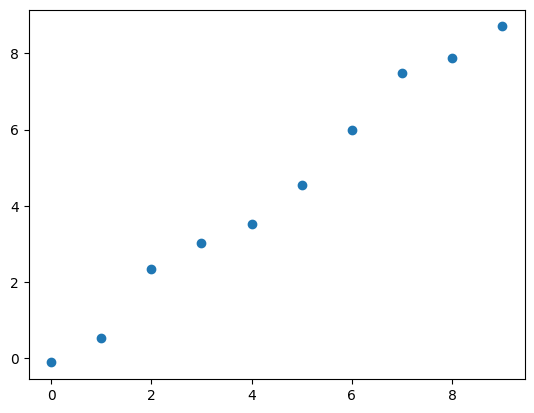

In [4]:
# Visualize the data
plt.scatter(features,labels)

In [5]:
# Delete any existing assignment to "model"
model = None

# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units=1,             # 1 neuron
                             activation='tanh',   # 'tanh'
                             input_dim=1))         # number of feature cols=1

# Model calculates loss using mean-square error (MSE)
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='mse',
             )

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


2023-06-30 17:14:19.549237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-30 17:14:19.656199: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model.fit(x=features,
          y=labels,
          epochs=10,    # train for 10 epochs
          batch_size=10,# use 10 examples per batch
          verbose=1)    # verbose=1 prints progress per epoch

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 37.2407
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 37.2398
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 37.2390
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 37.2382
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 37.2374
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 37.2365
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 37.2357
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 37.2348
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 37.2340
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 37.2331


Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.1147
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1088
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1073
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1067
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1045
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1035
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1033
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1042


Text(0.5, 1.0, 'Loss Curves')

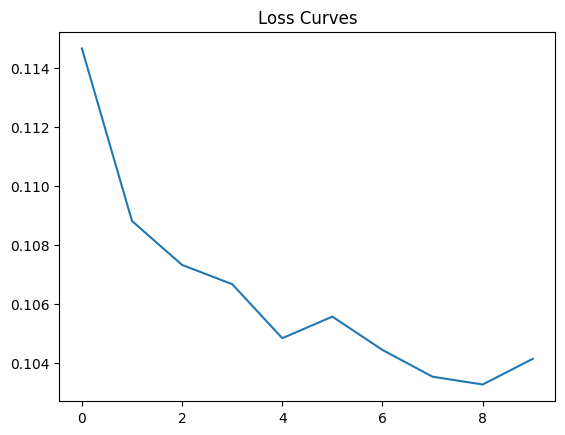

In [7]:
model = None
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='linear', input_dim=1))
model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mse')
trainHistory = model.fit(features, labels, epochs=10, batch_size=1, verbose=1)
# Plot loss curve
plt.plot(trainHistory.history['loss'])
plt.title('Loss Curves')

In [8]:
model = None
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='linear', input_dim=1))
model.compile(optimizer=tf.optimizers.Adam(0.1), loss='mse')
model.fit(features, labels, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3656
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2255
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1927


1/1 [==============================] - 0s 112ms/step


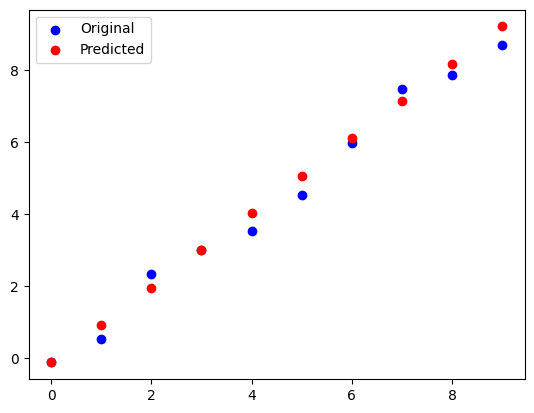

In [9]:
# get predictions
featuresPred = model.predict(features, verbose=1)
# Plot original features and predicted values
featuresPred = np.transpose(featuresPred)
plt.scatter(range(10), labels, c="blue")
plt.scatter(range(10), featuresPred, c="red")
plt.legend(["Original", "Predicted"])

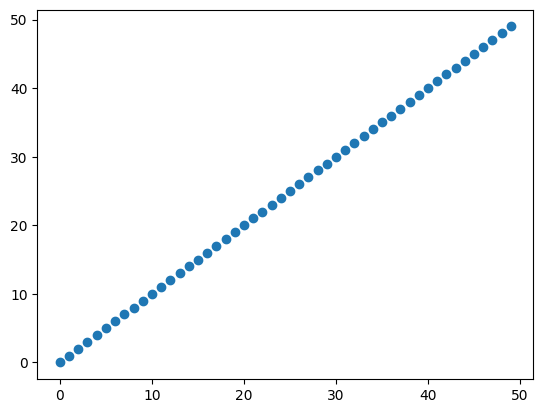

In [10]:
# create data with large values
features = np.array(range(50))
# generate labels
labels = features + np.random.random(features.shape) - 0.5

# Transpose data for input
[features, labels] = [features.transpose(), labels.transpose()]

plt.scatter(range(len(features)), features)

In [11]:
# Train on raw data
model = None
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer=keras.optimizers.SGD(0.01), loss='mse')
model.fit(features, labels, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
5/5 [==============================] - 1s 3ms/step - loss: 859439955968.0000
Epoch 2/5
5/5 [==============================] - 0s 2ms/step - loss: 811764177115930821656576.0000
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 361785975970048900164744817479254016.0000
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: inf
Epoch 5/5
5/5 [==============================] - 0s 2ms/step - loss: inf
